# PCA for Iris Dataset

### Import Data and Libraries

In [43]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
irisData = load_iris()
irisDf = pd.DataFrame(irisData.data, columns=irisData.feature_names)
irisDf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Feature Engineering

In [45]:
# Append the label column
irisDf['label'] = irisData.target
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
# Adding the names so we can visualize when plotting
# Create dictionary to map labels 0, 1, and 2 to the species
speciesDict = {
  0: 'setosa',
  1: 'versicolor',
  2: 'virginica'
}

# Change 0,1,2 to 'setosa', 'versicolor', and 'virginica'
irisDf.loc[:, 'label'] = irisDf.loc[:, 'label'].apply( lambda param: speciesDict[param] )
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Apply StandardScaling to all of the features

# Extract the features and as NumPy array
featuresDf = irisDf.drop('label', axis=1, inplace=False)
features = featuresDf.values

label = irisDf['label'].values

In [48]:
# Instantiate StandardScaler
scaler = StandardScaler()

# .fit_transform() will do two things:
# (1) apply standardization
# (2) fit (i.e, learn the parameters)
features = scaler.fit_transform(features)

In [49]:
# Instantiate PCA and set number of principal components to find
pca = PCA(n_components=2)

# Find the principal components
principalComponents = pca.fit_transform(features)

# Put the principal components into a Pandas DataFrame
pcDf = pd.DataFrame( data=principalComponents, columns=['PC1','PC2'] )

In [ ]:
# Create the final DataFrame containing the principal components and the label
finalDf = pd.DataFrame(data=pcDf, columns=['PC1','PC2'])

# Append the label just for visualiziing in THIS notebook
# we will not include the label in the exported CSV
finalDf['label'] = irisDf['label']

# preview the finalDf
finalDf.head()

KMeans would happen here...

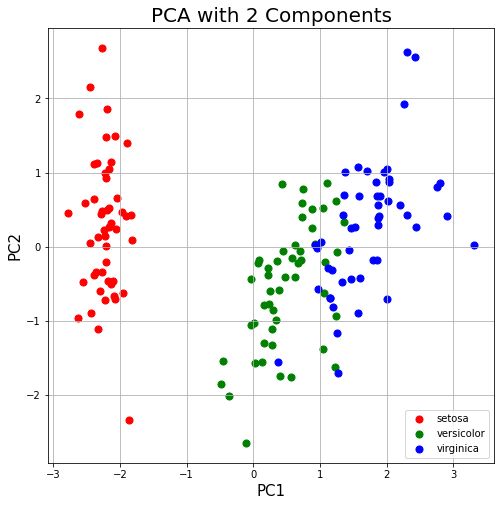

In [58]:
# Produce a plot to visualize the principal components
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
labels = irisDf.loc[:, 'label'].unique()
colors = ['r','g','b']

# zip() merges into one iterable tuple
for lbl, color in zip(labels, colors):
  indicesToKeep = finalDf['label'] == lbl
  ax.scatter(
      finalDf.loc[indicesToKeep, 'PC1'],
      finalDf.loc[indicesToKeep, 'PC2'],
      c = color,
      s = 50
  )

ax.set_xlabel('PC1', fontsize=15) 
ax.set_ylabel('PC2', fontsize=15) 
ax.set_title('PCA with 2 Components', fontsize=20)
# The reason we included the labels 'setosa', etc.
ax.legend(labels)

ax.grid()